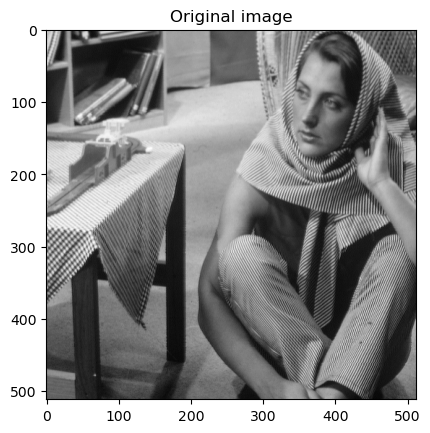

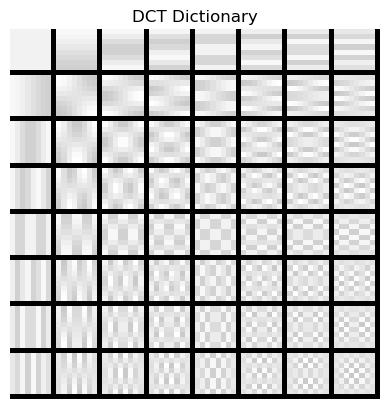



DCT dictionary: Training set, 


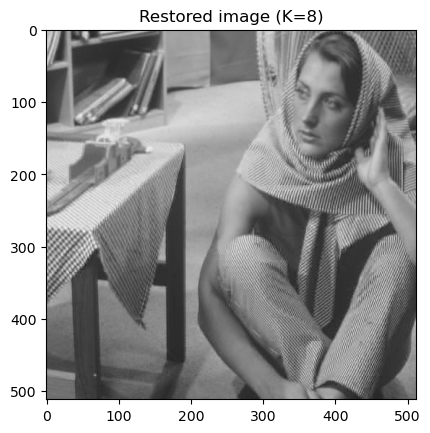

In [5]:
#CCH 20210409 DEMO 01: RESTORE IMAGE WITH STANDARD DCT DICTIONARY

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.util import view_as_windows as viewW
from skimage.util import view_as_blocks as viewB
from build_dct_unitary_dictionary import build_dct_unitary_dictionary
from show_dictionary import showDictionary
from batch_thresholding import batch_thresholding
from compute_stat import compute_stat
from unitary_dictionary_learning import unitary_dictionary_learning
import show_dictionary as showdict
from importlib import reload
reload(showdict)


# CCH 20200520 widthen display output
import pandas as pd

desired_width = 260
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 10)
np.set_printoptions(linewidth=desired_width)
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: " {0:7.3f}".format(x)})

# %% Part A: Data Construction and Parameter-Setting

# Read an image
im = np.array(Image.open('barbara.png'))
#im = np.array(Image.open('brain4.jpg'))
# im = np.array(Image.open('brain4_r01.jpg'))

# Show the image
plt.figure(0)
plt.imshow(im, 'gray')
plt.title('Original image')
# plt.show()

#Cardinaliteit van de sparse vectors
K = 8

# Patch dimensions [height, width]
dim = 8
patch_size = [dim, dim]

#Create the patches
all_patches = viewB(im, block_shape=(8, 8))
#CCH 20210409 64*64 bedekt het hele plaatje met niet-overlappende patches
num_train_patches = 4096

# p01 = np.array(all_patches[0, 31])
# print(p01)
# plt.figure(1)
# plt.imshow(p01, 'gray')
# plt.title('Patch x')
# plt.show()

#CCH 20210409 Initialiseer de patches met 0-waarden
train_patches = np.zeros((dim * dim, num_train_patches))

#CCH 20210409 Zet alle patches in een matrix van 64*4096
for i in range(num_train_patches):
    tp_x = np.floor_divide(i, 64)
    tp_y = np.mod(i, 64)
#    print('tpx: ', tp_x, ' tpy:', tp_y)
    train_patches[:, i] = all_patches[tp_x, tp_y].flatten()

# CCH 20210409 Maak en DCT dictionary
D_DCT = build_dct_unitary_dictionary(patch_size)
# Show the unitary DCT dictionary
plt.figure(3)
# plt.subplot(3, 2, 1)
showdict.showDictionary(D_DCT, 'DCT Dictionary')

# %% Part B: Compute the Representation Error Obtained by the DCT Dictionary

# Compute the representation of each patch that belongs to the training set using Thresholding
est_train_patches_dct, est_train_coeffs_dct = batch_thresholding(D_DCT, train_patches, K)
# print('coef:', est_train_coeffs_dct[:,0])

#CCH 20210409 En nu de est_train_patches_dct weer omsmurfen van 64*4096 naar 512*512 plaatje

restored_image = np.zeros((512, 512))

for i in range(num_train_patches):
    tp_x = np.floor_divide(i, 64)
    tp_y = np.mod(i, 64)
    # print('i: ', i, ' tpx: ', tp_x, ' tpy:', tp_y)
    pt = est_train_patches_dct[:, i].reshape(8, 8)
    restored_image[tp_x*8:tp_x*8+pt.shape[0], tp_y*8:tp_y*8+pt.shape[1]] += pt

plt.figure(5)
plt.imshow(restored_image, 'gray')
plt.title('Restored image (K='+ str(K)+ ')')

# Compute and display the statistics
print('\n\nDCT dictionary: Training set, ')
plt.show()


residual_error, avg_cardinality = compute_stat(est_train_patches_dct, train_patches, est_train_coeffs_dct)

# print('residual error:', residual_error)
# print('avg cardinality:', avg_cardinality)